In [2]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels

In [3]:
df = pd.read_pickle("../base_processed.pkl")


C:\Users\koran\AppData\Local\Temp\ipykernel_10468\2397120240.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0, 13000, 2000), size = 16)


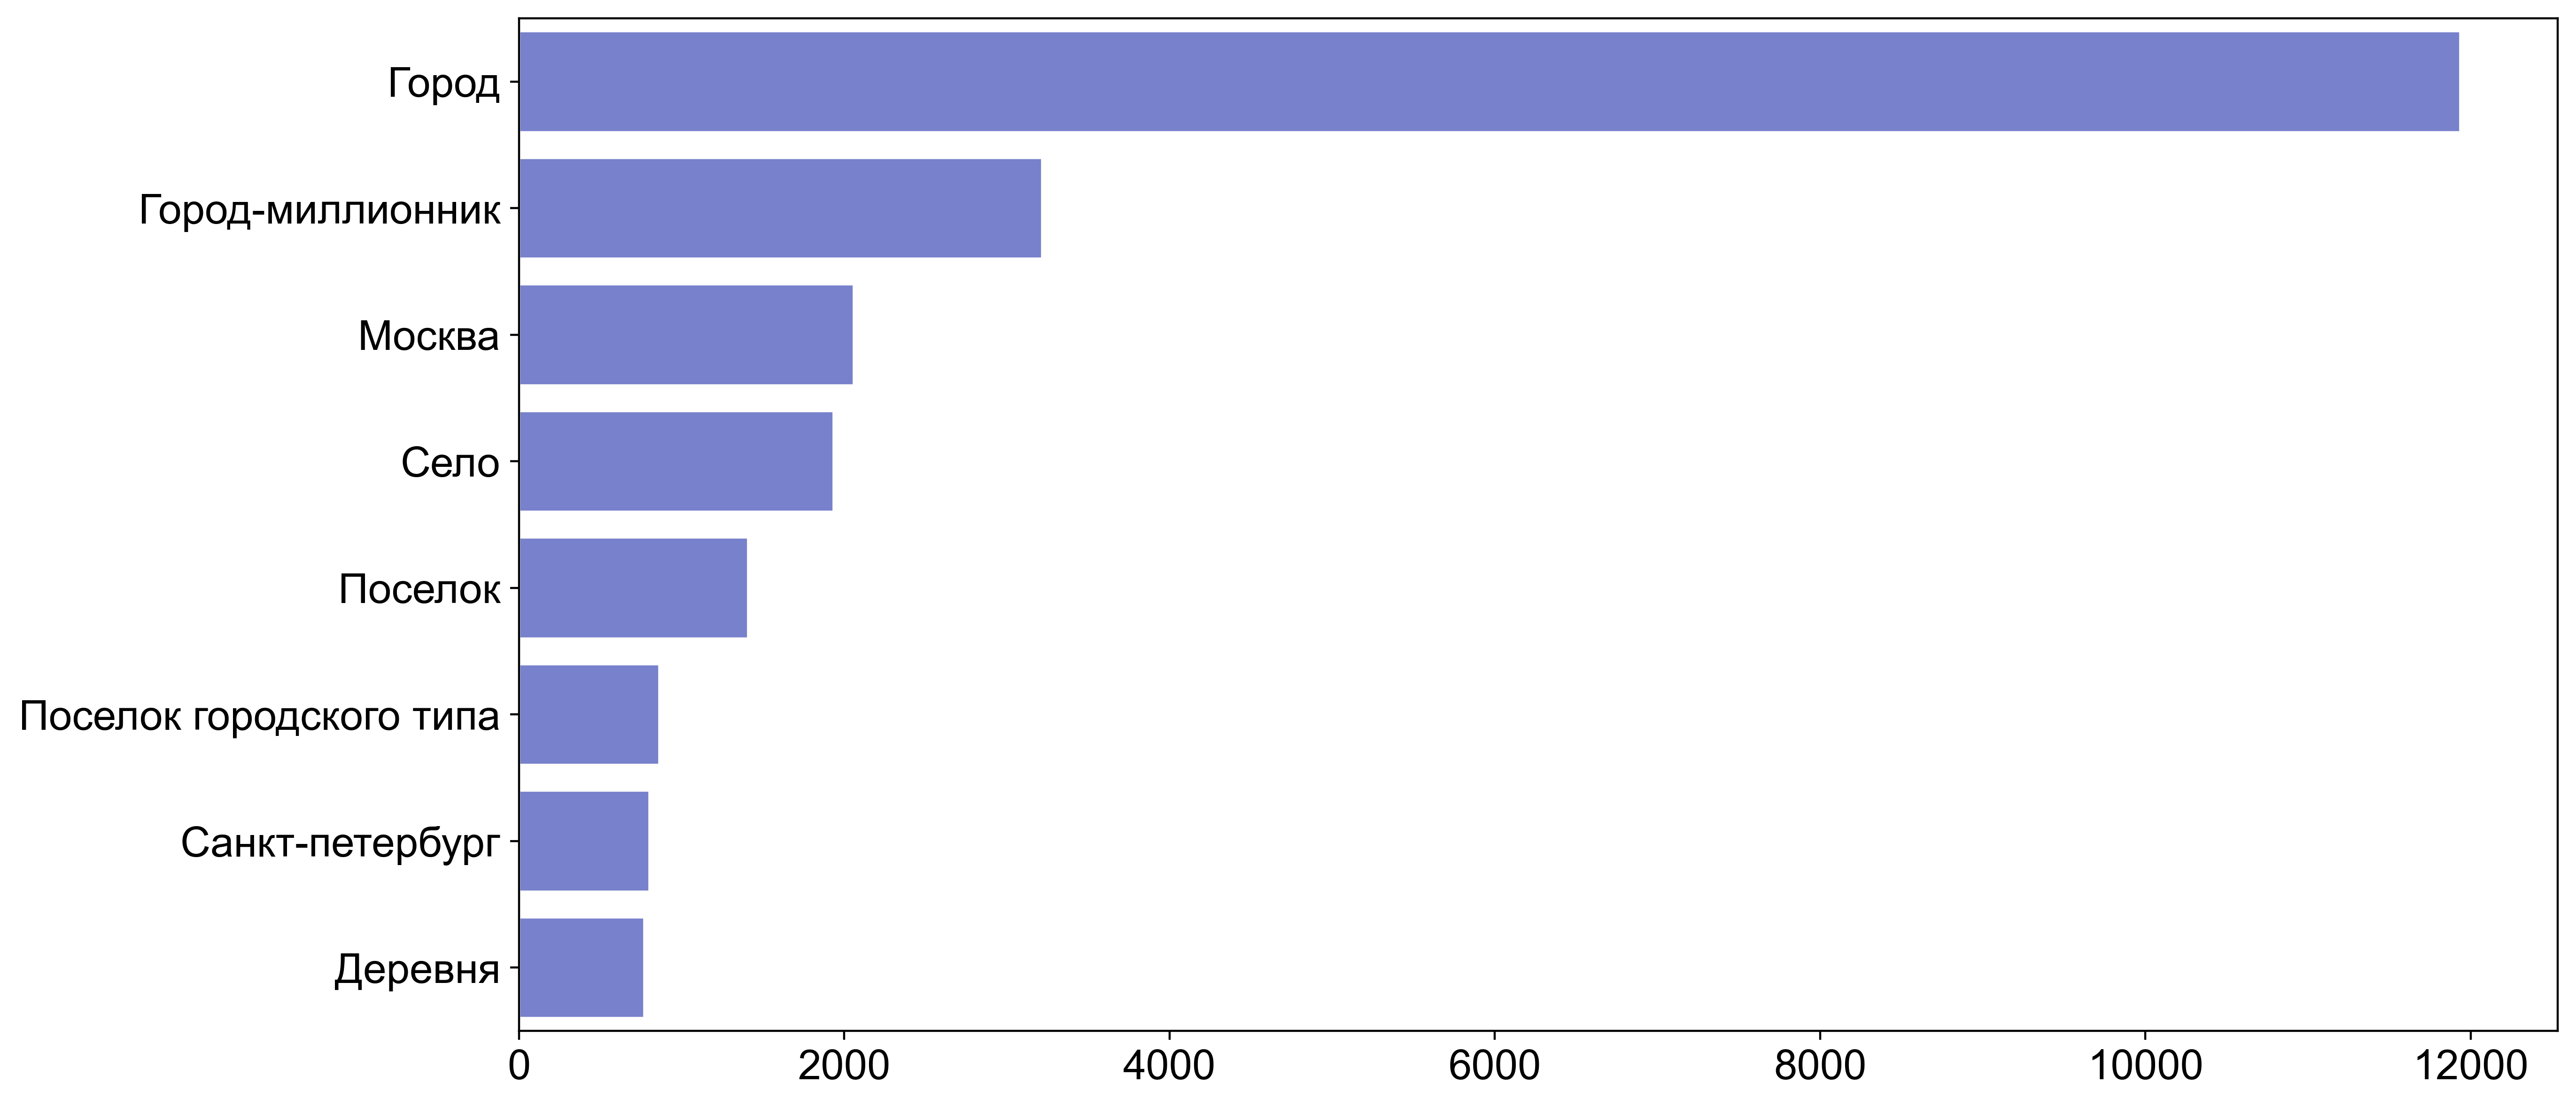

In [4]:
fig, ax = plt.subplots(figsize = (14, 7),dpi = 400)
sns.set_style("darkgrid", rc={'figure.facecolor': 'F9F9F9'})
df = df.dropna(subset=['region_size'])
res = pl.from_pandas(df[df["region_size"] != "неизвестно"]).group_by("region_size").count().to_pandas()
res = res.sort_values(by="count", ascending = False)
sns.barplot(res, y = "region_size", x = "count", color="#6A76D9")
ax.set_yticklabels([x.lower().capitalize() for x in map(str, res.region_size)], size = 16)
ax.set_xticklabels(np.arange(0, 13000, 2000), size = 16)
ax.set(xlabel= None, ylabel= None)
fig.savefig(r"../images/region_size_count_barplot.png")